In [1]:
import pandas as pd 
import requests
from os import getenv
from dotenv import load_dotenv

load_dotenv()

API_KEY = getenv('API_KEY')

In [2]:
NUM_PAGES = 100
data = []


for i in range(1,NUM_PAGES+1):
    resp = requests.get(f'https://api.nasa.gov/neo/rest/v1/neo/browse?page={i}&api_key={API_KEY}')
    data += resp.json()['near_earth_objects']

as

In [3]:
from functools import reduce
def union(df: pd.DataFrame, dict_data:dict) -> dict:
    try:
        dict_data["distance"] = pd.json_normalize(dict_data['close_approach_data'])['miss_distance.kilometers'].min()
    except:
        pass

    data = df.append(pd.DataFrame(dict_data, columns=['id', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid', 'distance'],index=[0]),  
                     ignore_index=True,
    )
    return data

init = pd.DataFrame(data[0], columns=['id', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid'],index=[0])
init["distance"] = pd.json_normalize(data[0]['close_approach_data'])['miss_distance.kilometers'].min()
data_df = reduce(union, data[1:], init )
data_df['distance'] = data_df['distance'].apply(float)

In [49]:
asteroid_close_approach = pd.DataFrame({'close_approach_date':[],'miss_distance.kilometers':[],'id':[]})
for i, asteroid in enumerate(data):
    try:
        acp = pd.json_normalize(asteroid['close_approach_data']).loc[:, ['close_approach_date', 'miss_distance.kilometers']]
        acp['close_approach_date'] = acp['close_approach_date'].apply(lambda x: int(x.split('-')[0]))
        acp['miss_distance.kilometers'] = acp['miss_distance.kilometers'].apply(float)
        acp['id'] = asteroid['id']
        
        asteroid_close_approach = asteroid_close_approach.append(acp, ignore_index=True)
    except:
        pass

    
    


/home/coutinho/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


close_approach_date
2000.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2001.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2002.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2003.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2004.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2005.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2006.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2007.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2008.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2009.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2010.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2011.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2012.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2013.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2014.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2015.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2016.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2017.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2018.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2019.0    [

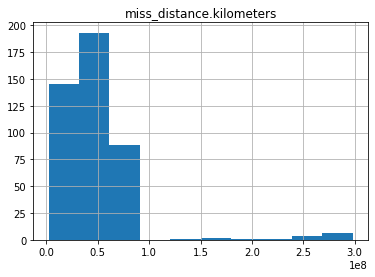

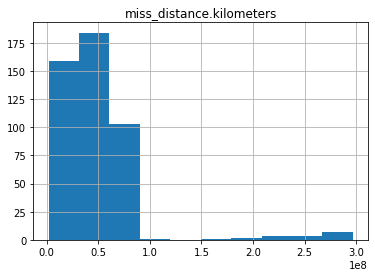

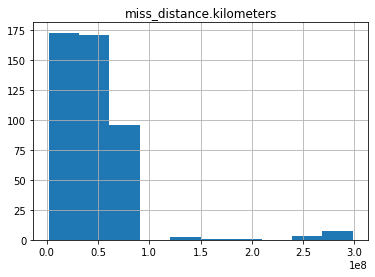

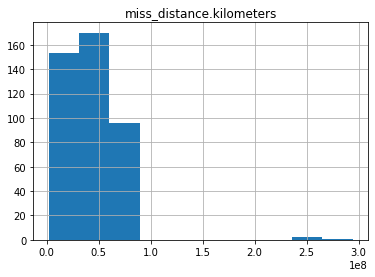

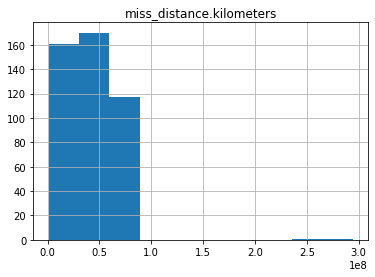

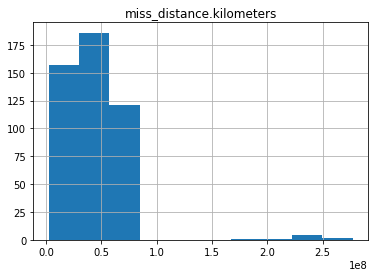

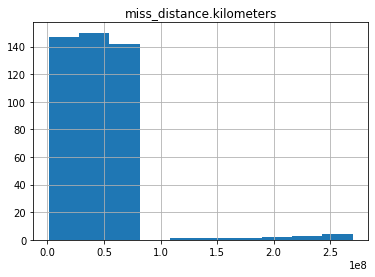

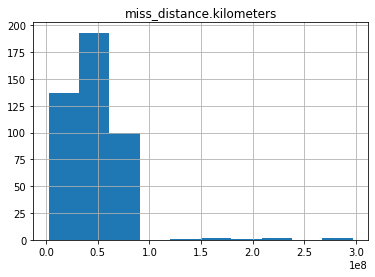

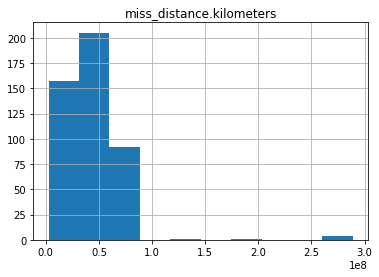

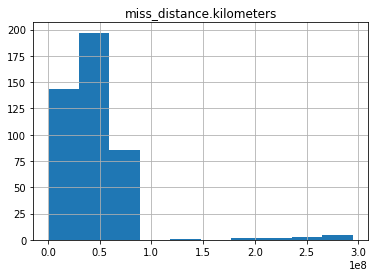

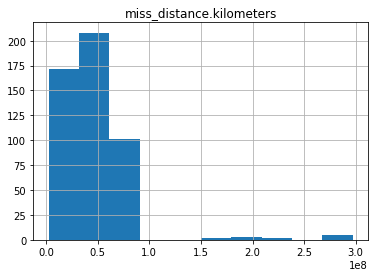

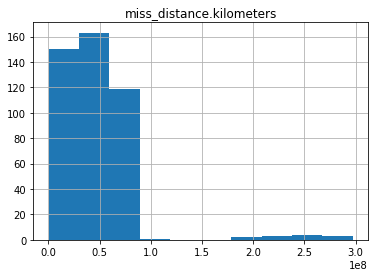

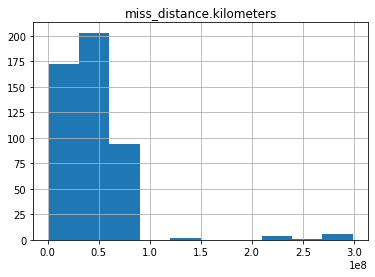

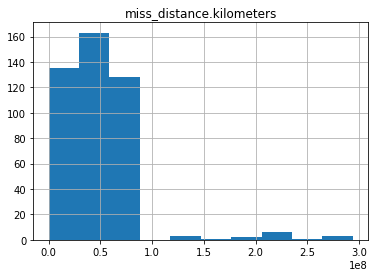

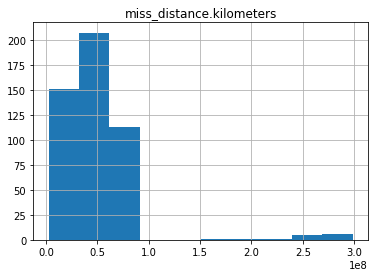

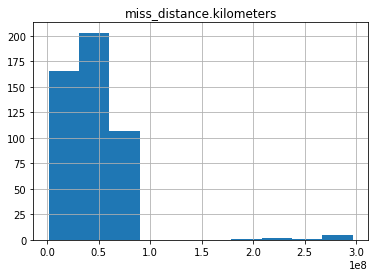

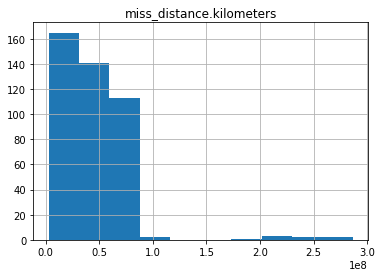

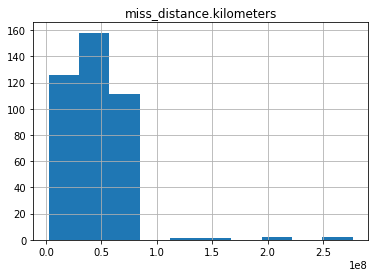

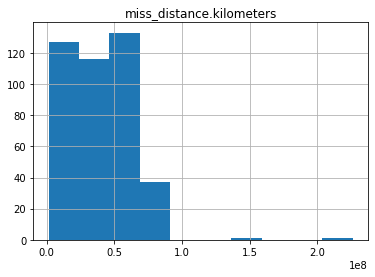

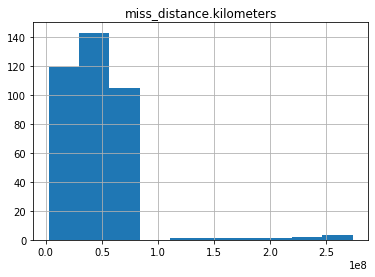

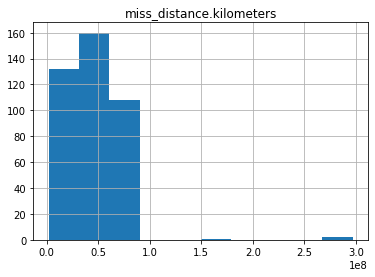

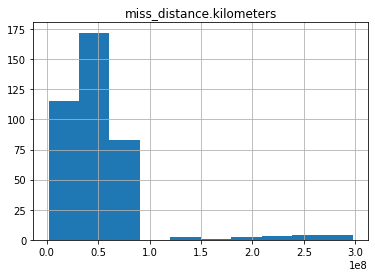

In [69]:
before_2021 = asteroid_close_approach[asteroid_close_approach['close_approach_date'] <= 2021]
before_2021[before_2021['close_approach_date']  >= 2000].groupby(by=['close_approach_date']).hist(column='miss_distance.kilometers')


In [311]:
print(f"{data_df['is_potentially_hazardous_asteroid'].sum()} asteroids are potentially hazardous")

537 asteroids are potentially hazardous


In [312]:
print(f"Mean distance:{data_df['distance'].mean()} and Standard Deviation: {data_df['distance'].std()}")

Mean distance:28557699.633082062 and Standard Deviation: 48435032.033591814


In [313]:
hazarous_asteroids = data_df['id'][data_df['is_potentially_hazardous_asteroid']]



In [314]:
hazarous_asteroids

0       2001981
6       2002101
7       2002102
8       2002135
9       2002201
         ...   
1986    2450142
1995    2450263
1996    2450270
1997    2450293
1998    2450300
Name: id, Length: 537, dtype: object

<AxesSubplot:title={'center':'Overlapped density function of all asteroids and hazardous asteroids'}, xlabel='Absolute Magnitude [au]', ylabel='Probability Density'>

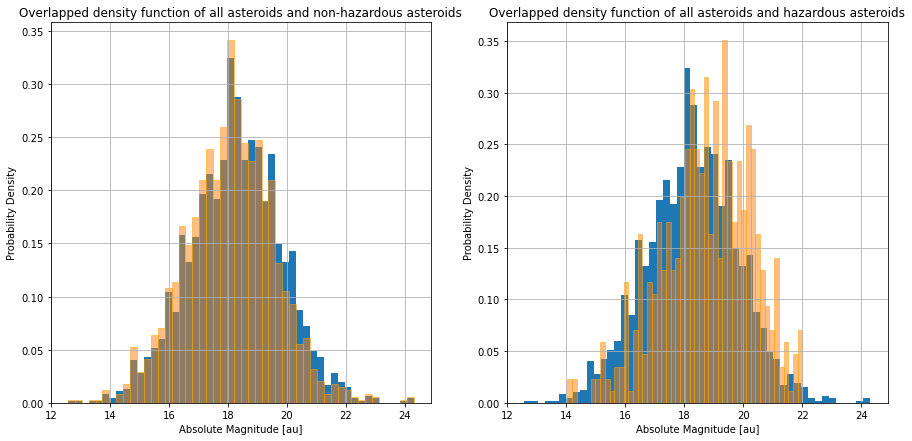

In [294]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(15,7),)

axes[0].set_xlabel("Absolute Magnitude [au]")
axes[0].set_ylabel("Probability Density")

axes[0].set_title("Overlapped density function of all asteroids and non-hazardous asteroids")
data_df['absolute_magnitude_h'].hist(bins=50, density=True, ax=axes[0])
data_df['absolute_magnitude_h'][~data_df['is_potentially_hazardous_asteroid']].hist(bins=50, density=True, alpha=.5, edgecolor='orange', ax=axes[0])

axes[1].set_xlabel("Absolute Magnitude [au]")
axes[1].set_ylabel("Probability Density")

axes[1].set_title("Overlapped density function of all asteroids and hazardous asteroids")
data_df['absolute_magnitude_h'].hist(bins=50, density=True, ax=axes[1])
data_df['absolute_magnitude_h'][data_df['is_potentially_hazardous_asteroid']].hist(bins=50, density=True, alpha=.5, edgecolor='orange', ax=axes[1])